In [17]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas_datareader.data as web
import datetime as dt
import quandl

In [18]:
start = dt.datetime(2012,1,1)
end = dt.datetime(2019,1,1)

In [19]:
from time import time as t
s=t()
x=[1]*9**9
e= t()
e-s

13.549854278564453

In [20]:
quandl.ApiConfig.api_key = 'uRWcAVUxxUNq8R5aLpG_'

googl =  quandl.get('WIKI/GOOGL.11', start_date= start, end_date= end)
aapl =  quandl.get('WIKI/AMZN.11', start_date= start, end_date= end)
tesla= quandl.get('WIKI/TSLA.11', start_date= start, end_date= end)

In [21]:
df=pd.concat([googl, aapl, tesla], axis=1)

In [22]:
df.columns= ['google', 'amazon', 'tesla']

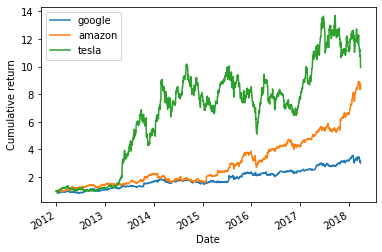

In [23]:
(df/df.iloc[0]).plot(ylabel = 'Cumulative return')
plt.savefig('stock.png')

In [24]:
#df.plot?

In [25]:
df_rate = df.pct_change(1)
#df/df.shift(1)

In [26]:
df_rate.describe()

,google,amazon,tesla
count,1566.000000,1566.000000,1566.000000
mean,0.000804,0.001528,0.001925
std,0.014146,0.018600,0.030372
min,-0.083775,-0.109972,-0.193274
25%,-0.005777,-0.007576,-0.013139
50%,0.000639,0.000935,0.000985
75%,0.007980,0.010950,0.017111
max,0.162584,0.157457,0.244029


In [30]:
df_rate= np.log(df/df.shift(1))
df_rate_stats= df_rate.describe()

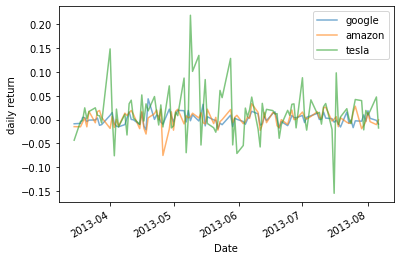

In [31]:
df_rate.iloc[300:400].plot(alpha=0.6, ylabel='daily return')
plt.savefig('dailyret.png')

In [32]:
num= 1000
Port=[]
Vol= np.zeros(num)
Ret = np.zeros(num)
Sharpe=np.zeros(num)
for i in range(num):
    port = np.random.uniform(0,1,3)
    port=port/port.sum()
    mean=df_rate_stats.loc['mean'].values
    std=df_rate_stats.loc['std'].values
    #vol= np.sqrt(np.sum(port**2*std**2))
    
    vol= np.sqrt(np.dot(port.T, np.dot(df_rate.cov() * 252, port)))

    
    ret = np.sum(port*mean)*252
    port_sharpe= ret/vol
    Vol[i]=vol
    Ret[i] = ret
    Sharpe[i]= port_sharpe
    Port.append(port)

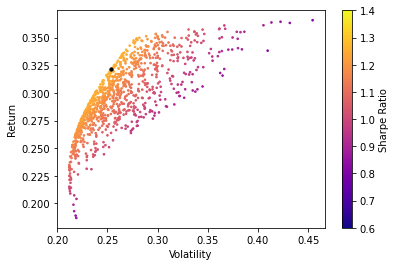

In [33]:
plt.scatter(Vol, Ret, c=Sharpe,cmap='plasma', s=2.6)
plt.colorbar(label='Sharpe Ratio')
plt.clim(0.6,1.4)
plt.xlabel('Volatility')



plt.ylabel('Return')

plt.scatter(Vol[np.argmax(Sharpe)],Ret[np.argmax(Sharpe)], c= 'k', s=10.6)

plt.savefig('sharpe_max.png')

## Saving images for gif

In [34]:
# n_img=1000
# plt.scatter(Vol[i:i+5], Ret[i:i+5], c=Sharpe[i:i+5],cmap='plasma',s=2.6)
# plt.clim(0.6,1.4)
# plt.colorbar(label='Sharpe Ratio')
# plt.ylim(0.18,0.42)
# plt.xlim(0.20,0.42)
# for i in range(n_img):
    
    
#     plt.scatter(Vol[10*i:10*i+10], Ret[10*i:10*i+10], c=Sharpe[10*i:10*i+10],cmap='plasma',s=2.6)
#     #
#     plt.clim(0.6,1.4)
#     plt.xlabel('Volatility')



#     plt.ylabel('Return')
    
# #     im=plt.scatter(x_n,y_n, s=1.9, c='r', marker='o', alpha=0.6)
# #     ims.append([im])

#     plt.savefig( "img/"+str(i)+'.png')


## Making the gif

In [35]:
# import imageio

# # Build GIF
# with imageio.get_writer('portfolio_all.gif', mode='I') as writer:
#     for i in range(n_img-500):
#         filename= str(i)+'.png'
#         image = imageio.imread("img/"+filename)
#         writer.append_data(image)

In [36]:
Port[np.argmax(Sharpe)]

array([0.15701162, 0.64690487, 0.1960835 ])